<a href="https://colab.research.google.com/github/kdahun/bigdata2023/blob/main/machineLearningUnderstanding1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import pandas as pd # 데이터 분석을 위한 데이터 프레임
import numpy as np # 다차원 배열
import matplotlib.pyplot as plt # 시각화
import seaborn as sns #통계분석과 시각화

In [39]:
concreat = pd.read_csv("/content/drive/MyDrive/concrete_na.csv의 사본")

In [40]:
concreat.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


<Axes: >

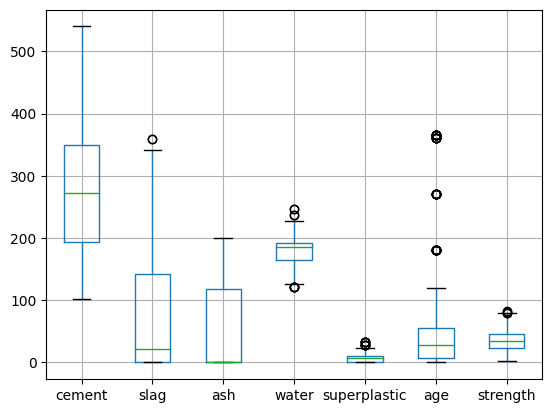

In [41]:
concreat.drop(["coarseagg","fineagg"],axis=1,inplace=False).boxplot()

In [42]:
# 결측치 여부 확인
print(concreat.isnull().sum()) # 열 별 결측치 갯수
print("총 결측치 갯수",concreat.isnull().sum().sum()) # 총 결측치 갯수

cement          1
slag            3
ash             1
water           1
superplastic    7
coarseagg       1
fineagg         2
age             1
strength        2
dtype: int64
총 결측치 갯수 19


In [43]:
# 결측치 채우기(1. fillna(값))
# 결측치 지우기(2. dropna(how = "all"또는  any") )

concreat.dropna(how = "any",inplace = True)

In [44]:
concreat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1020 non-null   float64
 1   slag          1020 non-null   float64
 2   ash           1020 non-null   float64
 3   water         1020 non-null   float64
 4   superplastic  1020 non-null   float64
 5   coarseagg     1020 non-null   float64
 6   fineagg       1020 non-null   float64
 7   age           1020 non-null   float64
 8   strength      1020 non-null   float64
dtypes: float64(9)
memory usage: 79.7 KB


In [45]:
# 중복데이터 존재 확인
concreat.duplicated().sum()
concreat.drop_duplicates(inplace=True)
concreat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        995 non-null    float64
 1   slag          995 non-null    float64
 2   ash           995 non-null    float64
 3   water         995 non-null    float64
 4   superplastic  995 non-null    float64
 5   coarseagg     995 non-null    float64
 6   fineagg       995 non-null    float64
 7   age           995 non-null    float64
 8   strength      995 non-null    float64
dtypes: float64(9)
memory usage: 77.7 KB


<Axes: >

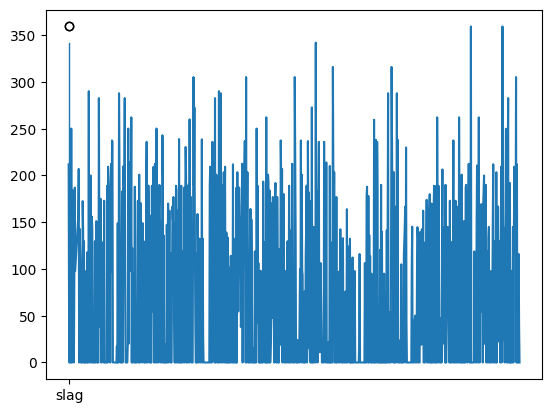

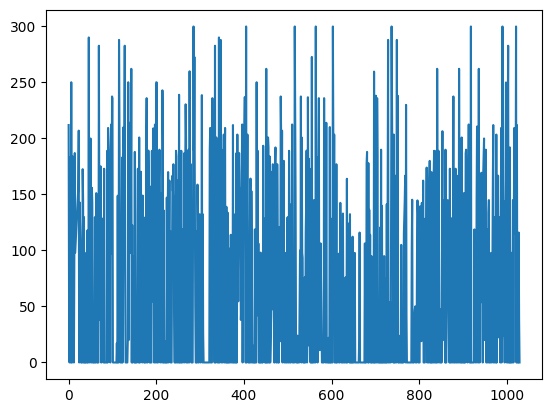

300.0

In [46]:
# 이상치는 제거가 아님? =>
display(concreat[['slag']].boxplot())
concreat['slag'].plot()
plt.show()
# max를 300으로 설정 후 300 이상인아웃라이너들을 300으로 다운 시킨다.
concreat['slag'][concreat.slag>300]=300
concreat['slag'].plot()
plt.show()
concreat.slag.max()

In [47]:
# 수치형 데이터를 범주형으로 변환

names = ["weak" , "normal","strong","strongest"]

concreat["labels"] = pd.cut(concreat['strength'],4,labels=names) # labels를 지정 안하면 구간이 나온다.
# qcut는 갯수가 균등하게 (갯수가 균등하도록)
# cut는 범위가 균등하게 (min과 max를 구간으로 나눈다)

In [50]:


concreat["q_labels"] = pd.qcut(concreat['strength'],4,labels=list("ABCD")) # labels를 지정 안하면 구간이 나온다.

In [51]:
display(concreat)
concreat.info()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,labels,q_labels
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,normal,B
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,normal,A
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,normal,B
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,strong,D
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,weak,A
...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29,weak,A
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30,normal,C
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28,strong,C
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06,strong,D


<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 1029
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cement        995 non-null    float64 
 1   slag          995 non-null    float64 
 2   ash           995 non-null    float64 
 3   water         995 non-null    float64 
 4   superplastic  995 non-null    float64 
 5   coarseagg     995 non-null    float64 
 6   fineagg       995 non-null    float64 
 7   age           995 non-null    float64 
 8   strength      995 non-null    float64 
 9   labels        995 non-null    category
 10  q_labels      995 non-null    category
dtypes: category(2), float64(9)
memory usage: 80.1 KB


In [56]:
print(concreat['labels'].unique())
print(concreat['labels'].value_counts())
print(concreat['q_labels'].unique())
print(concreat['q_labels'].value_counts())

['normal', 'strong', 'weak', 'strongest']
Categories (4, object): ['weak' < 'normal' < 'strong' < 'strongest']
normal       470
strong       235
weak         228
strongest     62
Name: labels, dtype: int64
['B', 'A', 'D', 'C']
Categories (4, object): ['A' < 'B' < 'C' < 'D']
A    251
D    249
B    248
C    247
Name: q_labels, dtype: int64


<Axes: >

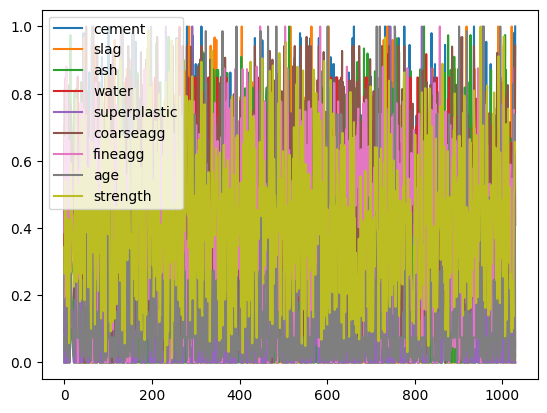

In [78]:
# 9개의 수치형 데이터의 범위를 통일 해주기
# 1. 최대 최소 정규화(최소값은 0이 되도록 최댓값은 1이 되도록 나머지는 0-1 사이에 분포하도록)
#   =>(x-최소값)/(최댓값-최소값)
conmon = concreat.iloc[:,:-2] # 원래 데이터
def minmax_normalize(arr):
  return (arr-arr.min())/ (arr.max()-arr.min())
minmax_normalize(concreat.iloc[:,:9])
conmon.apply(minmax_normalize).plot()



<Axes: >

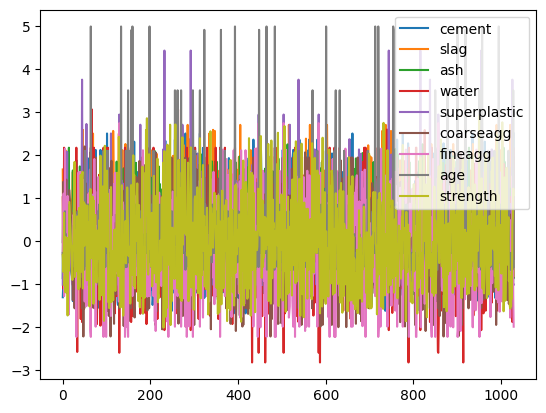

In [79]:
# 2. z-socre 표준화() => 각 각의 열의  데이터를 표준 정규분포(평균 1 표준편차 0)로
# z = (x - mean)/std

a = concreat.iloc[:,:-2]

def z_score(arr):
  return (arr-arr.mean())/arr.std()

a.apply(z_score).plot()

In [137]:
titanic = pd.read_csv("/content/drive/MyDrive/titanic_train.csv의 사본")

In [138]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
# 행 없애기
titanic.drop('Cabin',axis=1,inplace=True)

In [140]:
# 열 없애기
titanic.dropna(how='any',inplace=True)

In [141]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [142]:
# 중복 확인
titanic.duplicated().sum()

0

In [143]:
titanic = titanic[["Survived","Pclass","Sex","Age","Fare"]]

In [144]:
titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


In [145]:
a=titanic["Survived"].groupby([titanic["Survived"],titanic["Pclass"]]).size().unstack()
display(a)

Pclass,1,2,3
Survived,,,
0,64,90,270
1,120,83,85


In [146]:
titanic.pivot_table("Age",index=["Survived"],columns=["Pclass"],aggfunc="count",margins=True)

Pclass,1,2,3,All
Survived,,,,
0,64,90,270,424
1,120,83,85,288
All,184,173,355,712


In [147]:

a.loc['sum'] = a.sum()
a['sum']=a.sum(1)
#a.apply(survive)


In [148]:
a

Pclass,1,2,3,sum
Survived,,,,
0,64,90,270,424
1,120,83,85,288
sum,184,173,355,712


In [149]:
titanic["Survived"].groupby(titanic["Pclass"]).mean()

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64

In [167]:
titanic['Age'].value_counts().sort_index()

#names = ["weak" , "normal","strong","strongest"]

#concreat["labels"] = pd.cut(concreat['strength'],4,labels=names) # labels를 지정 안하면 구간이 나온다.

names= ["10","20","30","40","50","60","70","80"]

titanic["age_interval"] = pd.cut(titanic["Age"],8,labels=names)

In [168]:
titanic["age_interval"].value_counts()

30    230
40    154
20    115
50     86
10     64
60     42
70     16
80      5
Name: age_interval, dtype: int64

In [171]:
age_survived = titanic.groupby([titanic["Survived"],titanic["age_interval"]]).size().unstack()
age_survived['sum']=age_survived.sum(1)
age_survived.loc['sum']=age_survived.sum(0)

In [172]:
age_survived

age_interval,10,20,30,40,50,60,70,80,sum
Survived,,,,,,,,,
0,26,71,146,86,53,25,13,4,424
1,38,44,84,68,33,17,3,1,288
sum,64,115,230,154,86,42,16,5,712


In [177]:
titanic["Survived"].groupby([titanic["Sex"],titanic["age_interval"]]).mean().unstack()

age_interval,10,20,30,40,50,60,70,80
Sex,,,,,,,,
female,0.612903,0.739130,0.753086,0.833333,0.677419,0.928571,1.000000,NaN
male,0.575758,0.144928,0.154362,0.230000,0.218182,0.142857,0.071429,0.2


In [179]:
def age_survive(arr):
  return arr/arr.max()

age_survived.apply(age_survive)

age_interval,10,20,30,40,50,60,70,80,sum
Survived,,,,,,,,,
0,0.40625,0.617391,0.634783,0.558442,0.616279,0.595238,0.8125,0.8,0.595506
1,0.59375,0.382609,0.365217,0.441558,0.383721,0.404762,0.1875,0.2,0.404494
sum,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,1.000000
